### Analytics over Telecome Churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
id(df)

133721418464656

In [6]:
# before we make the chnages in orginal data, create n extra copy of it
df_new = df.copy()
df_new[:2]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
id(df_new)  # object with same data with different address is shallow copy

133721402150528

In [9]:
# remove customerID
df.drop(columns='customerID',inplace=True)

In [12]:
df.shape

(7043, 20)

In [15]:
# check for duplicate records
df.duplicated().sum()

22

In [17]:
# display duplicate records
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [18]:
df.shape

(7043, 20)

In [19]:
# delete duplocate records
df.drop_duplicates(inplace=True)

In [20]:
# check new shape after dropping 22 columns
df.shape

(7021, 20)

In [22]:
df['SeniorCitizen'].unique()

array([0, 1])

<Axes: xlabel='SeniorCitizen', ylabel='count'>

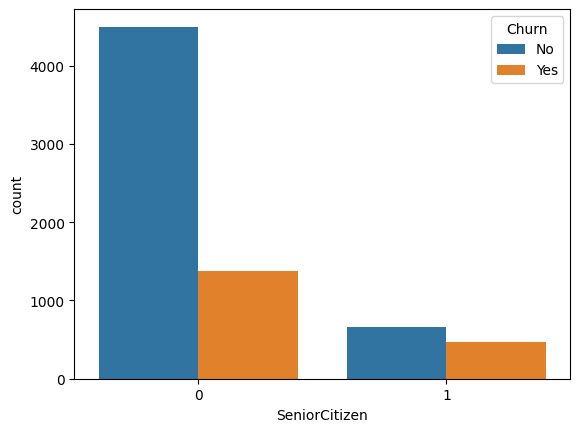

In [24]:
# work on SeniorCitizen w.r.t Churn
sns.countplot(x='SeniorCitizen', data=df,hue='Churn')

In [ ]:
# select all categorical columns and plot
cat = df.select_dtypes('object').columns
cat

In [ ]:
for col in cat[:-1]: #excpt Churn
    sns.countplot(x=col, data=df,hue='Churn')
    plt.show()

In [ ]:
# check % of male female
df['gender'].value_counts().plot(kind='pie',autopct='%.f%%')

In [ ]:
df['PaymentMethod'].value_counts().plot(kind='pie',autopct='%.f%%')

In [ ]:
df.info()

In [ ]:
# totalcharges dtype is an object
#df.TotalCharges.astype('float')
df.query('TotalCharges==""')

In [ ]:
df[df.TotalCharges == '']

In [ ]:
df[df.TotalCharges == None]

In [ ]:
#df.TotalCharges.isnull().sum()
df.TotalCharges.isna().sum()

In [ ]:
#df.TotalCharges.astype(float)
df[df.TotalCharges == ' ']

In [ ]:
df.tenure

In [ ]:
# take avg tenure
df.tenure.mean()

In [ ]:
# fill wherever we have 0
df.query('tenure==0')['tenure'] = 32

In [ ]:
ind = df.query('tenure==0').index
ind

In [ ]:
df.loc[ind,'tenure'] = 32

In [ ]:
df.query('tenure==0')

In [ ]:
# TotalCharge = MonthlyCharges * tenure
df.query('TotalCharges==" "')['TotalCharges']

In [ ]:
ind

In [ ]:
#df.loc[ind,'TotalCharges']
tt = df.loc[ind,:]
tt['tenure']*tt['MonthlyCharges']

In [ ]:
df.loc[ind,'TotalCharges']= tt['tenure']*tt['MonthlyCharges']

In [ ]:
df.loc[ind,'TotalCharges']

In [ ]:
# Change data type of Total Charges
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

In [ ]:
# sort data w.r.t TotalCharges

#df.sort_values(by='TotalCharges') #ascending
df.sort_values(by='TotalCharges',ascending=False) #ascending

In [ ]:
# add a feature with 5% discount in Monthly Charges
df['new_price'] = df.MonthlyCharges.apply(lambda amount:amount - (amount*0.05) )

In [ ]:
df[:3]

In [ ]:
# tenure>=12
ndf = df.query('tenure>=12')
sns.countplot(x='Contract',data=ndf,hue='Churn')

In [ ]:
# Stripplot
ax = sns.barplot(x='Churn',y='MonthlyCharges',data=ndf,hue='SeniorCitizen')
plt.xticks(rotation=90)

for i in ax.containers:
    ax.bar_label(i,)